# <center>ENEM - pt. 10
<hr>

## <center>Inicialização
<hr>

In [1]:
from tcc_funcoes import *
import warnings

from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error


=================================== Módulo importado com sucesso ===================================



In [2]:
dc_nome_grafico = {
    'Ciências Humanas': 'Humanas',
    'Ciências Natureza': 'Natureza',
    'Linguagem e Código': 'Linguagem',
    'Matemática': 'Matemática',
    'Redação': 'Redação'
}

## <center>Previsões para o XGBoost
<hr>

In [3]:
# dc_teste = abre_arquivo_pickle('dc_teste.pkl')
# dc_treino = abre_arquivo_pickle('dc_treino.pkl')
# dc_xgb = abre_arquivo_pickle('dc_modelos_xgb.pkl')

# warnings.filterwarnings("ignore", message="X does not have valid feature names")

# dc_z_teste_xgb = {}
# dc_z_treino_xgb = {}

# for nome, dc in dc_xgb.items():

#     dc_z_teste_xgb[nome] = {}
#     dc_z_treino_xgb[nome] = {}

#     x_teste = dc_teste[nome]['x']
#     x_treino = dc_treino[nome]['x']

#     for n_estimators, modelo in dc.items():

#         print(f'Fazendo predições para {nome} com {n_estimators} árvores...')

#         dc_z_teste_xgb[nome][n_estimators] = modelo.predict(x_teste.to_numpy())
#         dc_z_treino_xgb[nome][n_estimators] = modelo.predict(x_treino.to_numpy())

#         if nome == 'Redação':

#             dc_z_teste_xgb[nome][n_estimators] = arredonda_redacao(dc_z_teste_xgb[nome][n_estimators])
#             dc_z_treino_xgb[nome][n_estimators] = arredonda_redacao(dc_z_treino_xgb[nome][n_estimators])

#     print()

# salva_arquivo_pickle('dc_z_teste_xgb.pkl', dc_z_teste_xgb)
# salva_arquivo_pickle('dc_z_treino_xgb.pkl', dc_z_treino_xgb)

## <center>Métricas para o XGBoost
<hr>

In [4]:
# dc_z_teste_xgb = abre_arquivo_pickle('dc_z_teste_xgb.pkl')
# dc_z_treino_xgb = abre_arquivo_pickle('dc_z_treino_xgb.pkl')

# warnings.filterwarnings("ignore", message="The behavior of DataFrame concatenation")

# df_resultados = pd.DataFrame(columns=['modelo', 'prova', 'n_estimators', 'rmse_teste', 'mape_teste', 'rmse_treino', 'mape_treino'])

# for nome in dc_z_teste_xgb.keys():

#     for n_estimators, vetor_teste in dc_z_teste_xgb[nome].items():
            
#             vetor_treino = dc_z_treino_xgb[nome][n_estimators]
#             y_teste = dc_teste[nome]['y']
#             y_treino = dc_treino[nome]['y']

#             mse_teste = root_mean_squared_error(y_teste.to_numpy(), vetor_teste)
#             mape_teste = 100 * mean_absolute_percentage_error(y_teste.to_numpy(), vetor_teste)

#             mse_treino = root_mean_squared_error(y_treino.to_numpy(), vetor_treino)
#             mape_treino = 100 * mean_absolute_percentage_error(y_treino.to_numpy(), vetor_treino)

#             dc = {
#                 'modelo': 'XGBoost',
#                 'prova': nome,
#                 'n_estimators': n_estimators,
#                 'rmse_teste': mse_teste,
#                 'mape_teste': mape_teste,
#                 'rmse_treino': mse_treino,
#                 'mape_treino': mape_treino
#             }

#             df_resultados = pd.concat(
#                 [
#                     df_resultados,
#                     pd.DataFrame([dc])
#                 ], ignore_index=True)

# salva_arquivo_pickle('df_resultados_xgb.pkl', df_resultados)

In [5]:
df_resultados = abre_arquivo_pickle('df_resultados_xgb.pkl')

Ciências Humanas - Redução do erro MAPE: 0.3512%
Ciências Natureza - Redução do erro MAPE: 0.4203%
Linguagem e Código - Redução do erro MAPE: 0.4258%
Matemática - Redução do erro MAPE: 0.4000%
Redação - Redução do erro MAPE: 0.4093%


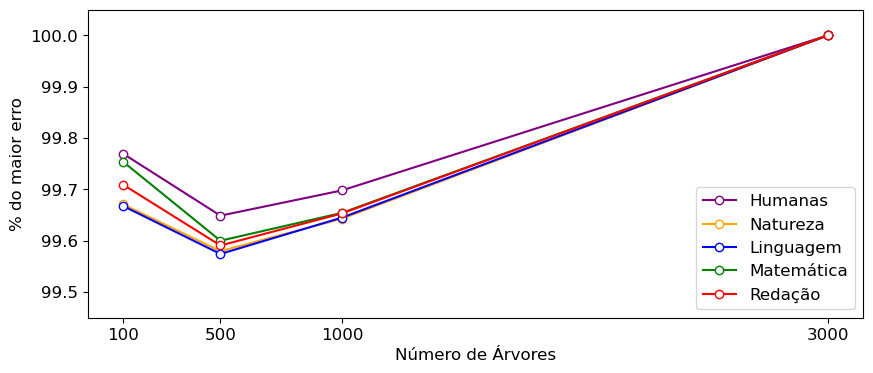

In [6]:
plt.figure(figsize=(10, 4))

plt.xlabel('Número de Árvores', fontsize=12)
plt.ylabel('% do maior erro', fontsize=12)

plt.ylim(99.45, 100.05)

plt.yticks([99.5, 99.6, 99.7, 99.8, 99.9, 100], fontsize=12)
plt.xticks([100, 500, 1000, 3000], fontsize=12)

dc_cor = {
    'Redação': 'red',
    'Linguagem e Código': 'blue',
    'Matemática': 'green',
    'Ciências Natureza': 'orange',
    'Ciências Humanas': 'purple'
    }

for prova in df_resultados['prova'].unique():

    data = df_resultados[df_resultados['prova'] == prova]['mape_teste']

    estimadores = df_resultados[df_resultados['prova'] == prova]['n_estimators']

    data_normalizada = 100 * data / data.max()

    plt.plot(
        estimadores,
        data_normalizada,
        marker='o',
        linestyle='-',
        color=dc_cor[prova],
        markerfacecolor='white',
        alpha=1,
        label=dc_nome_grafico[prova],
        linewidth=1.5
        )
    
    print(f'{prova} - Redução do erro MAPE: {data_normalizada.max() - data_normalizada.min():.4f}%')

plt.legend(fontsize=12, loc='lower right')

plt.savefig(f"../texto/imagens/erro_final_xgb.png", dpi=300, bbox_inches='tight')

plt.show()

In [7]:
provas = df_resultados['prova'].unique()

estimadores = df_resultados['n_estimators'].unique()

print(f"Prova | 100 estimadores | 500 estimadores | 1000 estimadores | 3000 estimadores |")

for prova in provas:

    print(f"{prova} | ", end='')

    for n in estimadores:

        mape = df_resultados.query("prova == @prova and n_estimators == @n")['mape_teste'].values[0]

        print(f"{mape:.3f}% | ", end='')
    print()

Prova | 100 estimadores | 500 estimadores | 1000 estimadores | 3000 estimadores |
Ciências Humanas | 12.321% | 12.306% | 12.312% | 12.350% | 
Ciências Natureza | 10.877% | 10.867% | 10.874% | 10.913% | 
Linguagem e Código | 10.220% | 10.210% | 10.217% | 10.254% | 
Matemática | 15.076% | 15.053% | 15.061% | 15.113% | 
Redação | 21.239% | 21.214% | 21.227% | 21.301% | 


In [ ]:
exit()

: 